Populating the interactive namespace from numpy and matplotlib
[[ 1.62434536 -1.07296862  1.74481176]
 [-0.61175641  0.86540763 -0.7612069 ]
 [-0.52817175 -2.3015387   0.3190391 ]]
[[ 0.75062962  0.6775828  -0.09989127]
 [ 2.46210794  0.61594565  0.82757179]
 [-1.06014071  2.13376944  0.12214158]]


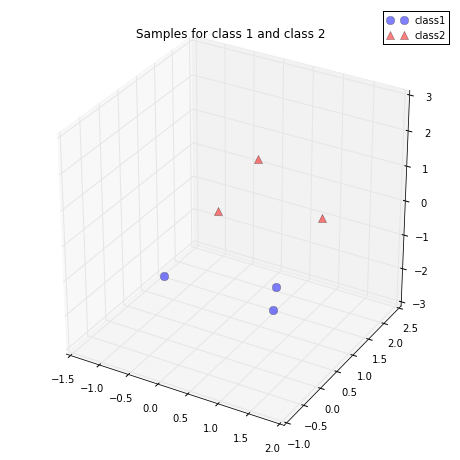

In [28]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import numpy as np
np.random.seed(1)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 3).T
print(class1_sample)
assert class1_sample.shape == (3,3), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 3).T
print(class2_sample)
assert class1_sample.shape == (3,3), "The matrix has not the dimensions 3x20"


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 
        '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

### 2. Объеденить две матрици

In [12]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1) 
print(all_samples)

[[ 1.62434536 -1.07296862  1.74481176  0.75062962  0.6775828  -0.09989127]
 [-0.61175641  0.86540763 -0.7612069   2.46210794  0.61594565  0.82757179]
 [-0.52817175 -2.3015387   0.3190391  -1.06014071  2.13376944  0.12214158]]


###3. Метематическое ожидание

In [15]:
mean_x=np.mean(all_samples[0,:])
mean_y=np.mean(all_samples[1,:])
mean_z=np.mean(all_samples[2,:])
print(all_samples[0,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

[ 1.62434536 -1.07296862  1.74481176  0.75062962  0.6775828  -0.09989127]
Mean Vector:
 [[ 0.60408494]
 [ 0.56634495]
 [-0.21915017]]


In [20]:
scatter_matrix = np.zeros((3,3))
print(scatter_matrix)
print(all_samples.shape[1])

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
6


In [22]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot(
        (all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[  5.67715745  -3.12032628   3.60035212]
 [ -3.12032628   6.90437222  -2.36163782]
 [  3.60035212  -2.36163782  11.08145985]]


In [23]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.13543149 -0.62406526  0.72007042]
 [-0.62406526  1.38087444 -0.47232756]
 [ 0.72007042 -0.47232756  2.21629197]]


In [24]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.46502374]
 [ 0.42892932]
 [-0.77444984]]
Eigenvalue 1 from scatter matrix: 14.551309994713252
Eigenvalue 1 from covariance matrix: 2.9102619989426532
Scaling factor:  5.0
----------------------------------------
Eigenvector 2: 
[[ 0.83195685]
 [ 0.51079366]
 [-0.21665097]]
Eigenvalue 2 from scatter matrix: 2.8238091865875363
Eigenvalue 2 from covariance matrix: 0.564761837317508
Scaling factor:  5.0
----------------------------------------
Eigenvector 3: 
[[-0.30265612]
 [ 0.74505669]
 [ 0.59438186]]
Eigenvalue 3 from scatter matrix: 6.287870340698885
Eigenvalue 3 from covariance matrix: 1.2575740681397771
Scaling factor:  5.0
----------------------------------------


In [25]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), 
                                         eig_val_sc[i] * eigv, 
                                         decimal=6, err_msg='', verbose=True)

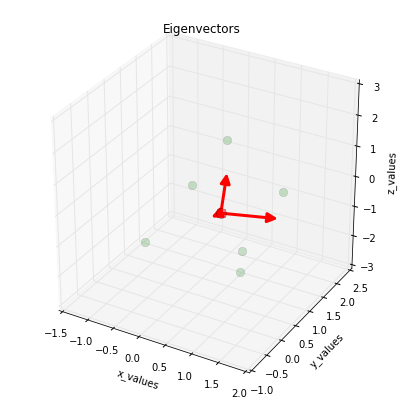

In [27]:
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 
        'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 
        'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]+mean_x], 
                [mean_y, v[1]+mean_y], 
                [mean_z, v[2]+mean_z], 
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")

    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()